<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 1 - Simple and Multiple Linear Regression</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate two linear regression models- Simple Linear Regression and Multiple Linear Regression.**



**Guidelines**

* Make sure to run all the code cells, otherwise you may get errors like NameError for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as IPYNB file and submit to D2L `Lab 1 - Simple and Multiple Linear Regression (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Simple Linear Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `House Prices.csv` file into a dataset and perform the following:

> **Q1.1.** Visualize the dataset

> **Q1.2.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.3.** Fit a regression model to predict the house `price` based on the house `square_footage` 

> **Q1.4.** Evaluate and discuss the model goodness of fit

In [210]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
import seaborn as sns
%matplotlib inline


In [211]:
#Import/Read Dataset
dataset_df = pd.read_csv("House Prices.csv")
# dataset_df.describe()
dataset_df['price'].describe()

count      1000.00000
mean      75086.47110
std       22526.24462
min       23919.44000
25%       57493.73000
50%       74970.70000
75%       91349.24750
max      134557.20000
Name: price, dtype: float64

#### Q 1.1 Performing EDA / Visualizing the Dataset

In [212]:
#Perfoming EDA
dataset_df.info()
dataset_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   square_footage  1000 non-null   float64
 1   price           1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


,square_footage,price
0,1932.65,66690.35
1,4340.14,111116.52
2,3464.18,83877.06
3,3487.12,81352.80
4,3067.75,96720.25
5,1935.86,66420.62
6,2891.17,81435.23
7,2203.01,86729.19
8,3512.30,118094.00
9,3890.66,103916.88


Pearson corr. coef 0.8334105319708631 and P-value is 2.8179973064407554e-259


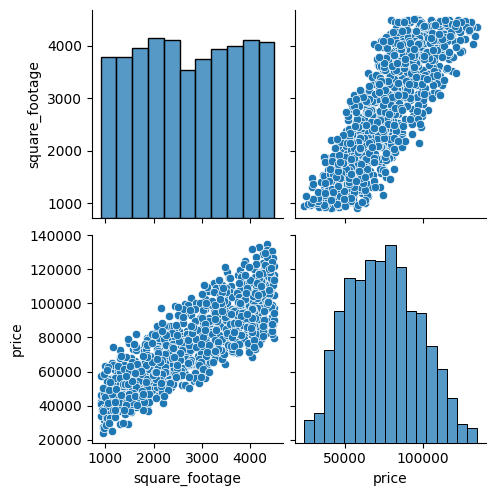

<Axes: >

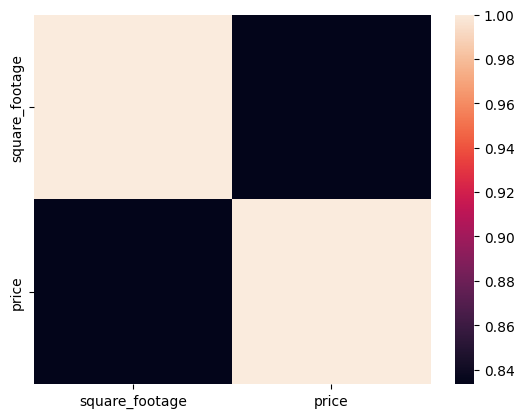

In [213]:
#Some more correlational analysis between variables
corr_coef, p_val = stat.pearsonr(dataset_df['square_footage'], dataset_df['price'])
print(f"Pearson corr. coef {corr_coef} and P-value is {p_val}")
sns.pairplot(dataset_df)
plt.show()
#More visuals using heatmap on correlation
sns.heatmap(dataset_df.corr())

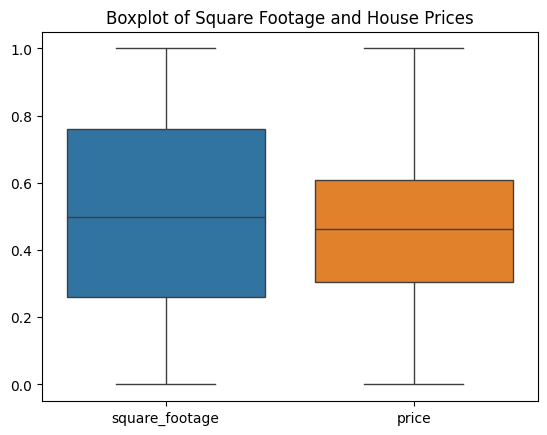

In [214]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(dataset_df), columns=dataset_df.columns)

plt.figure()
sns.boxplot(data=df_normalized)
plt.title('Boxplot of Square Footage and House Prices')
plt.show()


In [215]:
X = dataset_df.iloc[:,:-1].values # Accessing the Square_foot - independent variable array.
y = dataset_df.iloc[:,-1].values #Accessing the Price - dependent variable array (the last one is the target to be predicted so).


In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3 , random_state = 42)


In [217]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [218]:
y_pred =regression_model.predict(X_test)
print(y_pred)

[ 49799.49130149  89486.34565567  59179.04616426  97639.16308331
  93394.35727155  81092.83118945  85147.80424247  98885.70125595
  52751.61777245  62995.86539269  50640.75015861  44025.85056391
  43697.41264258 105509.68375777  57700.34888572  75943.36782891
  67459.02429153 104380.86006135  94367.86325628  68516.8196543
  56356.80526507  97819.73127678  77259.66272821  97775.40669005
  99353.83428873  78161.41374672  47992.35610162  92658.0968207
  75630.18919154  53018.65524167  74326.6103622   76003.31501588
 106002.15898161  57895.26807244  90690.55748116  55383.48093848
  90725.61750263  98370.51876431  86228.30687304  67740.04943771
  83046.56451018  72572.88265617  50660.36923798  92756.73719198
  92120.7520357   44766.28915204  88420.3756765   70117.40954634
  69696.50763057  71767.41045309  80235.04144138  63745.02357165
  80357.29737117  81968.06011918  89886.17522693  88291.2167373
  62793.49822214 103428.42642113  96195.70748438  52197.92375463
  63412.77082933  88351.7088

In [219]:
print(y_test)

[ 29472.88 109092.8   76171.4   94505.38  89701.05  60394.35  95164.18
  83317.4   78992.    52864.36  45703.2   28949.15  45817.6  100764.
  60352.26  65738.58  68788.86 122402.2   76203.9   60686.    50541.2
 108492.44  80863.76  87934.16  98131.01  89853.4   53957.72  83226.98
  50617.7   60255.3   74598.76  81844.8  106569.67  44146.5   79661.71
  66176.57 114619.2   99150.6   73060.83  72586.08  65201.44  77540.32
  59775.54  74945.92  71591.12  53419.26 108871.88  61873.87  73869.1
  77953.98  70958.19  86481.08  91794.4   83205.05  95963.    89155.8
  58959.1  101174.94 105106.6   57040.39  64469.6  105272.72  69923.2
  84444.08  56384.48  65908.35 110490.71  90045.36  42191.7   79679.8
  78031.68  94722.6   63774.48  54181.52  92568.07  95400.    70248.
  73475.35  73247.92  86076.65 101256.08  93363.82  72973.85  91351.55
  94039.2   89918.3   88219.72  36664.14  74358.6   43500.43  90594.27
  76857.7   71876.45  66727.6   75903.94  53743.    81142.3   65726.16
  73934.38  998

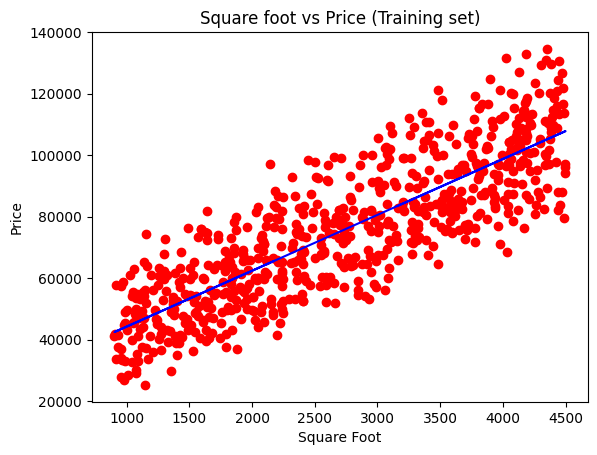

In [220]:
# visualizing the results
#plot for the TRAIN
  
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regression_model.predict(X_train), color='blue') # plotting the regression line
plt.title("Square foot vs Price (Training set)") # stating the title of the graph
  
plt.xlabel("Square Foot") # adding the name of x-axis
plt.ylabel("Price") # adding the name of y-axis
plt.show() # specifies end of graph

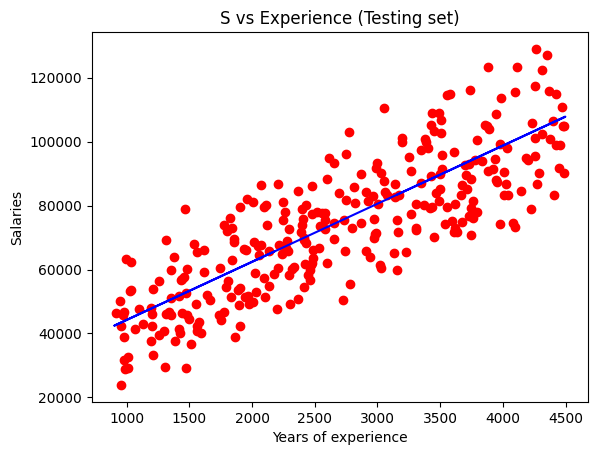

In [221]:
#plot for the TEST
  
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regression_model.predict(X_train), color='blue') # plotting the regression line
plt.title("S vs Experience (Testing set)")
plt.xlabel("Years of experience") 
plt.ylabel("Salaries") 
plt.show() 

In [222]:
print(regression_model.coef_)

[18.16581423]


In [223]:
print(regression_model.intercept_)

26081.4776067082


In [224]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.673201970653168

# Question 2: Multiple Linear Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `Car Prices.csv` file and perform the following:

> **Q2.1.** Preprocess and clean the dataset: This step should include the following:

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with the unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 

> **Q2.2.** Visualize the dataset

> **Q2.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q2.4.** Fit a regression model to predict the car `price` based on the other features in the dataset 

> **Q2.5.** Evaluate and discuss the model goodness of fit

In [225]:
car_dataframe = pd.read_csv("Car Prices.csv")
car_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [226]:
car_dataframe.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [227]:
print(car_dataframe.columns)
car_dataframe = car_dataframe.drop(columns='car_ID') #Drop unncessary columns
print(car_dataframe.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


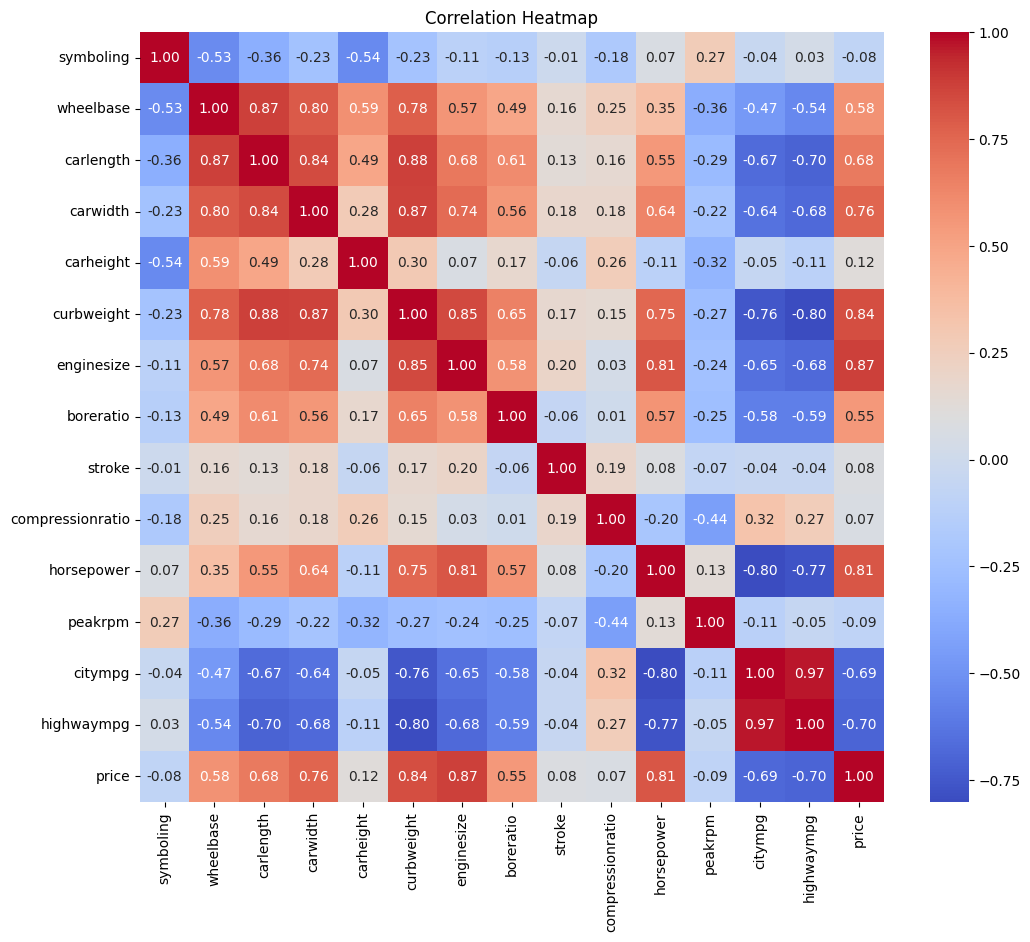

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64


In [238]:
# Assuming 'car_dataframe' is your DataFrame containing features
correlation_matrix = car_dataframe.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
print(correlation_matrix['price'])

In [230]:

# Identify missing values
missing_values = car_dataframe.isnull().any()
print(missing_values) #Printing the series after checking missing values




symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool


In [231]:
numeric_columns = car_dataframe.select_dtypes(include=['number'])


# Calculate the IQR for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Identify outliers
outliers = (numeric_columns < (Q1 - threshold * IQR)) | (numeric_columns > (Q3 + threshold * IQR))

# Display rows containing outliers
rows_with_outliers = car_dataframe[outliers.any(axis=1)]
print(rows_with_outliers)

     symboling                   CarName fueltype aspiration doornumber  \
6            1                audi 100ls      gas        std       four   
7            1                 audi 5000      gas        std       four   
8            1                 audi 4000      gas      turbo       four   
9            0       audi 5000s (diesel)      gas      turbo        two   
15           0                    bmw x4      gas        std       four   
..         ...                       ...      ...        ...        ...   
182          2          vokswagen rabbit   diesel        std        two   
184          2      volkswagen model 111   diesel        std       four   
187          2   volkswagen super beetle   diesel      turbo       four   
192          0  volkswagen rabbit custom   diesel      turbo       four   
203         -1                 volvo 246   diesel      turbo       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
6        sedan        fwd   

   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2   0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3   0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4   0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio    stroke  compressionratio  ...  \
0    0.074449   0.519071 -1.839377         -0.288349  ...   
1    0.074449   0.519071 -1.839377         -0.288349  ...   
2    0.604046  -2.404880  0.685946         -0.288349  ...   
3   -0.431076  -0.517266  0.462183         -0.035973  ...   
4    0.218885  -0.517266  0.462183         -0.540725  ...   

                    CarName  fueltype  aspiration  doornumber      carbody  \
0       alfa-romero stelvio       gas         std         two  convertible   
1       alfa-romero stelvio       gas         std 

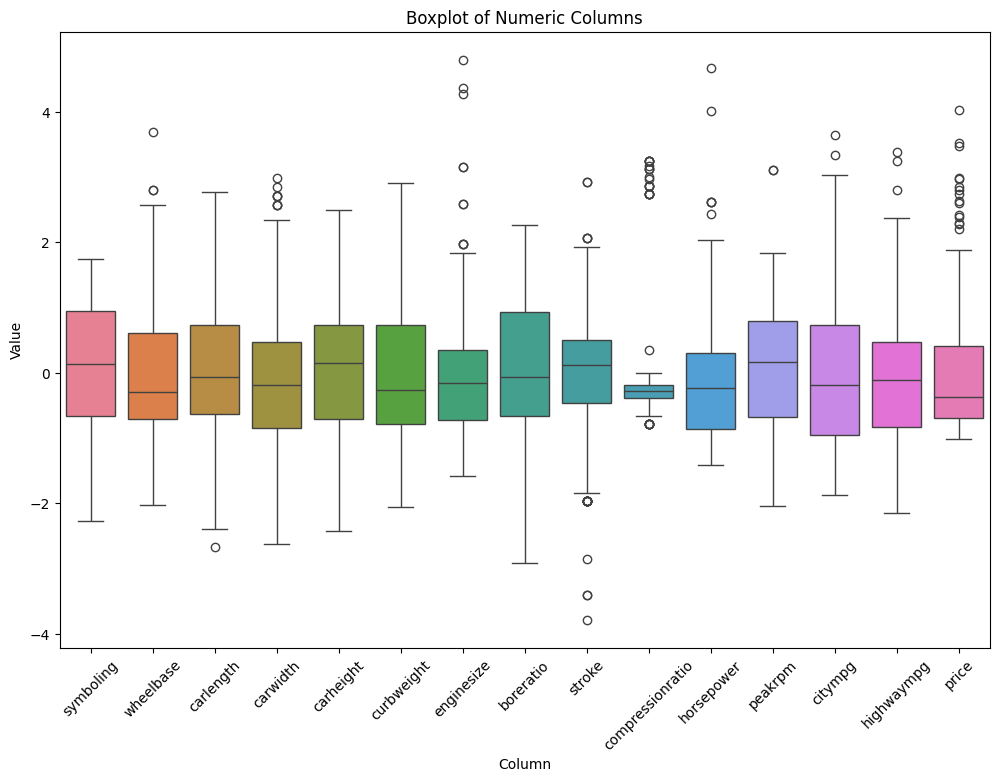

In [232]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'car_dataframe' is your DataFrame
# Select only the numeric columns
numeric_columns = car_dataframe.select_dtypes(include=['number'])

# Initialize the scaler
scaler = StandardScaler()

# Normalize the numeric columns
normalized_numeric_columns = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# Combine the normalized numeric columns with the non-numeric columns
# Assuming 'non_numeric_columns' contains the non-numeric columns
non_numeric_columns = car_dataframe.select_dtypes(exclude=['number'])
normalized_car_dataframe = pd.concat([normalized_numeric_columns, non_numeric_columns], axis=1)

# Print the first few rows of the normalized DataFrame
print(normalized_car_dataframe.head())
numeric_columns = normalized_car_dataframe.select_dtypes(include=['number'])

# Plot box plots for each numeric column to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns)
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

???

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit Lab7.ipynb to the **Lab1- Simple and Multiple Linear Regression (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection